<a href="https://colab.research.google.com/github/marknaman05/cat-dog-classification/blob/main/Cat_vs_Dog_Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/covid/dataset_new.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import numpy as np

In [ ]:
# https://keras.io/api/preprocessing/image/#imagedatagenerator-class
## data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/dataset_new/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/dataset_new/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
### Creating model and layers
model = Sequential();   ## blank model
# Step 1 - Convolution
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))   ## applied for under/over fitting
# Step 1 - Convolution
model.add(Conv2D(64,(3,3),activation='relu'))
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
# Step 3 - Flattening
model.add(Flatten())
### output
# Step 4 - Full connection
model.add(Dense(1, activation='sigmoid'))   ## output layer
# Compiling the CNN
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,
          epochs = 200,
          steps_per_epoch=2000//32,
          validation_steps=500//32,
          validation_data = test_set)

Epoch 1/200
62/62 [==============================] - 21s 312ms/step - loss: 0.6954 - accuracy: 0.5122 - val_loss: 0.6907 - val_accuracy: 0.5229
Epoch 2/200
62/62 [==============================] - 17s 274ms/step - loss: 0.6907 - accuracy: 0.5208 - val_loss: 0.6863 - val_accuracy: 0.5104
Epoch 3/200
62/62 [==============================] - 17s 273ms/step - loss: 0.6802 - accuracy: 0.5630 - val_loss: 0.6708 - val_accuracy: 0.5437
Epoch 4/200
62/62 [==============================] - 17s 266ms/step - loss: 0.6500 - accuracy: 0.6280 - val_loss: 0.6468 - val_accuracy: 0.6250
Epoch 5/200
62/62 [==============================] - 16s 260ms/step - loss: 0.6190 - accuracy: 0.6606 - val_loss: 0.6308 - val_accuracy: 0.6812
Epoch 6/200
62/62 [==============================] - 16s 252ms/step - loss: 0.6009 - accuracy: 0.6702 - val_loss: 0.6055 - val_accuracy: 0.6958
Epoch 7/200
62/62 [==============================] - 17s 271ms/step - loss: 0.5891 - accuracy: 0.6931 - val_loss: 0.6122 - val_accuracy:

1/1 [==============================] - 0s 16ms/step


1.0

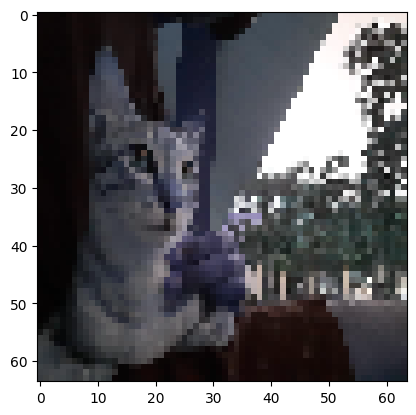

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/IMG-20230123-WA0042.jpg")
img = cv2.resize(img,(64,64))
plt.imshow(img);
model.predict(np.array([img]))[0][0]

In [ ]:
model.save("catdog.h5")